# # Weather Data Regression
# 
# This notebook applies regression on weather data collected from OpenWeatherMap for 17 Canadian cities.
# We will preprocess the data, combine different datasets, train a regression model to predict temperature, and analyze the results based on actual weather trends.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score 

# ## 1. Load and Explore Data
# We load real-time, historical, and forecast weather data for regression.

In [3]:
# Load Data
real_time_df = pd.read_csv('C:\\Users\\Sandeep Mondkar\\Downloads\\weather_data.csv', encoding='latin1')
historical_df = pd.read_csv('C:\\Users\\Sandeep Mondkar\\Downloads\\historical_hourly_data.csv', encoding='latin1')
forecast_24h_df = pd.read_csv('C:\\Users\\Sandeep Mondkar\\Downloads\\24_hour_forecast.csv', encoding='latin1')
forecast_14d_df = pd.read_csv('C:\\Users\\Sandeep Mondkar\\Downloads\\14_day_forecast.csv', encoding='latin1')

In [4]:
# Combine datasets
weather_df = pd.concat([real_time_df, historical_df, forecast_24h_df, forecast_14d_df], ignore_index=True)
weather_df.head()

,city,country,temperature_celsius,feels_like_celsius,temperature_min_celsius,temperature_max_celsius,weather,lat,lon,pressure,humidity,wind_speed,wind_deg,visibility,sunrise,sunset,datetimestamp,date_time,date
0,Vancouver,CA,5.52,1.49,4.14,6.27,clear sky,49.2497,-123.1193,1016,80,6.17,300,10000.0,2025-03-06 10:44:08,2025-03-06 22:03:26,2025-03-06 12:53:42,NaN,NaN
1,Victoria,CA,4.97,3.27,3.87,6.98,clear sky,48.4329,-123.3693,1016,86,2.06,30,10000.0,2025-03-06 10:44:30,2025-03-06 22:05:05,2025-03-06 12:52:29,NaN,NaN
2,Calgary,CA,1.56,-2.08,-0.16,3.14,clear sky,51.0501,-114.0853,1011,73,3.58,260,10000.0,2025-03-06 10:09:33,2025-03-06 21:25:46,2025-03-06 12:53:38,NaN,NaN
3,Edmonton,CA,1.74,-1.48,0.45,2.67,few clouds,53.5501,-113.4687,1010,66,3.09,260,10000.0,2025-03-06 10:09:21,2025-03-06 21:21:02,2025-03-06 12:53:00,NaN,NaN
4,Regina,CA,-10.01,-16.19,-10.01,-9.94,clear sky,50.4501,-104.6178,1017,90,3.60,240,10000.0,2025-03-06 09:31:13,2025-03-06 20:48:22,2025-03-06 12:56:18,NaN,NaN


# ## 2. Data Cleaning and Preprocessing
# 
# We filter relevant features, handle missing values, and prepare the data for regression.

In [5]:
# Select features for regression
columns_to_keep = ['temperature_celsius', 'feels_like_celsius', 'humidity', 'pressure', 'wind_speed']
weather_df = weather_df[columns_to_keep].dropna()

In [6]:
# Define the target variable and features
X = weather_df.drop(columns=['temperature_celsius'])
y = weather_df['temperature_celsius']

In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ## Data Definition
# 
# The dataset contains the following fields:
# - `temperature_celsius`: Current temperature in degrees Celsius (target variable).
# - `feels_like_celsius`: What the temperature feels like in degrees Celsius.
# - `humidity`: Humidity percentage.
# - `pressure`: Atmospheric pressure in hPa.
# - `wind_speed`: Wind speed in m/s.

# ## 3. Train Regression Model
# 
# We use a Linear Regression model to predict temperature.

In [8]:
# Initialize and train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [9]:
# Predict on the test set
y_pred = regressor.predict(X_test)

# ## 4. Evaluate Model Performance
# 
# We evaluate the model performance using mean squared error and R-squared metrics.

In [10]:
# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [11]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.47803069288977923
R-squared: 0.9850241713372034


# ## 5. Visualize Predictions
# 
# We visualize the actual vs predicted temperatures to analyze model performance.

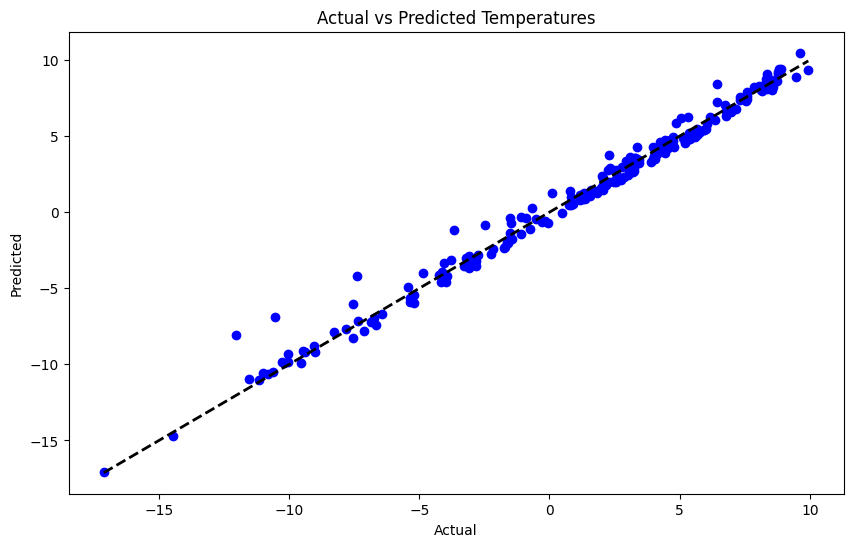

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Temperatures')
plt.show()

# ## 6. Model Analysis & Summary
# 
# The Linear Regression model provides insights into temperature prediction based on weather features. Below is the summary of the model performance:

In [14]:
# Summary
print("\nModel Summary:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Model Summary:
Mean Squared Error: 0.47803069288977923
R-squared: 0.9850241713372034


# Workbook Summary:
# The regression model predicts temperature based on 'feels_like_celsius', 'humidity', 'pressure', and 'wind_speed'. The performance metrics (Mean Squared Error and R-squared) indicate how well the model fits the data. Visualizing the actual vs predicted temperatures helps in understanding the model's accuracy and areas for improvement.